# Informationen
## 3,3 mm Air + gitter 80 % transparrent + 1 mm Air + Al-mylar + 1,5 mm Air +ZnS
## 3 MeV
## 146-148 Sm, 148 150 152 Gd, 190 Pt, 209 Bi

#### Air: Density (g/cm3) =	1.20479E-03
#### POLYETHYLENE TEREPHTHALATE (MYLAR): Density (g/cm3) =	1.40000E+00


In [414]:
# Imports
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy import optimize
import scipy.optimize 
%matplotlib inline

In [435]:
#def find_corr_number( array1, array2, element):
#    i= np.where(array1== element)
#    return array2[i]
def f_prim(x,a0,a1,a2,a3,a4):
    if (x<= 0):
        return 0
    else:
        return np.exp(a0+a1*np.log(x)+a2*np.log(x)**2+a3*np.log(x)**3+a4*np.log(x)**4)
def f_Sec(x,a0,a1,a2,a3,a4):
    return np.exp(a0+a1*np.log(x)+a2*np.log(x)**2+a3*np.log(x)**3+a4*np.log(x)**4)
def Stopping_Power_Al(Energy):
    return f(Energy,7.10324628e+00,  -1.94662466e-01,  -1.46767221e-01,   1.20252433e-03, 1.79847844e-03)
def Stopping_Power(Energy):    #dE/dx
    return f(Energy,7.51161379e+00, -1.95417699e-01, -1.94390614e-01, -1.24903581e-04,2.79996333e-03)
def New_Stopping_power(Energy,length,dichte):
     Stopping_Power(Energy)*length*dichte

dichte_luft = 1.20479E-03
dichte_Al = 2.69890E+00
dichte_Mylar=1.40000E+00

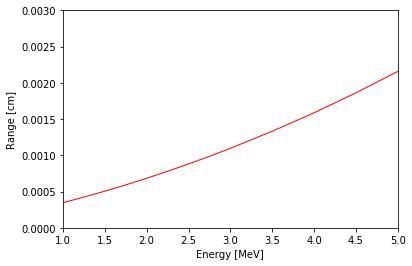

In [416]:
#input file for dry Air Range
Al='Aldata.pl'


data_Al = np.loadtxt(Al, comments='#')

Energy = data_Al[:,0] #kanal
Stopping_Power_import = data_Al[:,1] #Energie
Range_CSDA = data_Al[:,2]
plt.xlim(1,5)
plt.ylim(0,.003)
plt.xlabel('Energy [MeV]')
plt.ylabel('Range [cm]')
plt.plot(Energy,Range_CSDA/2.7,'r-',linewidth=1)


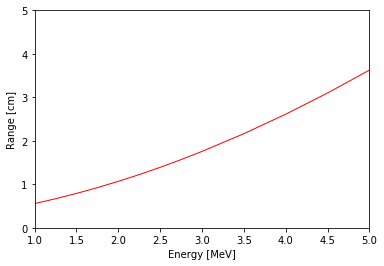

In [417]:
#input file for dry Air Range
dry_air='drayair.pl'

data_Air = np.loadtxt(dry_air, comments='#')

Energy = data_Air[:,0] #kanal
Stopping_Power_import = data_Air[:,1] #Energie
Range_CSDA = data_Air[:,2]
plt.xlim(1,5)
plt.ylim(0,5)
plt.xlabel('Energy [MeV]')
plt.ylabel('Range [cm]')
plt.plot(Energy,Range_CSDA/1.20479E-03,'r-',linewidth=1)


In [6]:
####################################################################################################
#####################################NICHT WEG MACHEN!!!############################################
####################################################################################################
#input file for dry Air Stopping
#plt.xlim(1,5)
#plt.xlabel('Energy [MeV]')
#plt.ylabel('Stopping Power [cm*MeV]')
#plt.plot(Energy,Stopping_Power_import*1.20479E-03,'r-',linewidth=1)
####################################################################################################
#####################################NICHT WEG MACHEN!!!############################################
####################################################################################################

In [418]:
dry_air = 'drayair.pl'
Al = 'Aldata.pl'
Mylar = 'Mylar.pl'
dary_air_data = np.loadtxt(dry_air, comments='#')
Al_data = np.loadtxt(Al, comments='#')
Mylar_data = np.loadtxt(Mylar, comments='#')

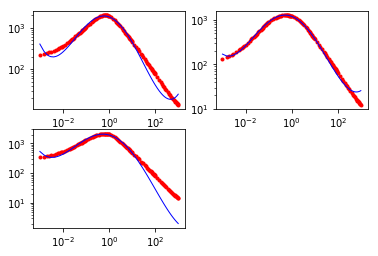

In [535]:
Energy_dry_air = dary_air_data[:,0] #kanal
Stopping_Power_dry_air = dary_air_data[:,1] #Energie
Range_CSDA_dry_air = dary_air_data[:,2]

Energy_Al = Al_data[:,0] #kanal
Stopping_Power_Al = Al_data[:,1] #Energie
Range_CSDA_Al = Al_data[:,2]

Energy_Mylar = Mylar_data[:,0] #kanal
Stopping_Power_Mylar = Mylar_data[:,1] #Energie
Range_CSDA_Mylar = Mylar_data[:,2]

popt_air, pcov_air = curve_fit(f_Sec, Energy_dry_air, Stopping_Power_dry_air,p0=[-2.4,7.6,-0.3,-0.02,0.02])
popt_Al, pcov_Al = curve_fit(f_Sec, Energy_Al, Stopping_Power_Al,p0=[-2.4,7.6,-0.3,-0.02,0.02])
popt_Mylar, pcov_Mylar = curve_fit(f_Sec, Energy_Mylar, Stopping_Power_Mylar,p0=[-2.4,7.6,-0.3,-0.02,0.02])



#plt.xlim(1e-3,10)
#plt.ylim(1,100000)
plt.figure(1)
plt.subplot(221)
plt.loglog(Energy_dry_air,Stopping_Power_dry_air,'r.',linewidth=1)
plt.loglog(Energy_dry_air,f_Sec(Energy_dry_air,*popt_air),'b-',linewidth=1)
plt.subplot(222)
plt.loglog(Energy_Al,Stopping_Power_Al,'r.',linewidth=1)
plt.loglog(Energy_Al,f_Sec(Energy_Al,*popt_Al),'b-',linewidth=1)
plt.subplot(223)
plt.loglog(Energy_Mylar,Stopping_Power_Mylar,'r.',linewidth=1)
plt.loglog(Energy_Mylar,f_Sec(Energy_Mylar,*popt_Mylar),'b-',linewidth=1)

In [537]:
def Stopping_Power_Air(Energy):
    return f_prim(Energy,*popt_air)
def Stopping_Power_Al(Energy):
    return f_prim(Energy,*popt_Al)
def Stopping_Power_Mylar(Energy):
    return f_prim(Energy,*popt_Mylar)
#test!
print(Stopping_Power_Air(-5))
print(Stopping_Power_Al(5))
print(Stopping_Power_Mylar(5))

0
618.229473713
884.768441792


In [639]:
def Stopping_Power_step_Air(Energy , length, n):
    multiplicator = dichte_luft * length
    for i in range(n):
        Energy = Energy - Stopping_Power_Air(Energy)*multiplicator
#        print(Energy)
    return Energy
def Stopping_Power_step_Al(Energy , length, n):
    multiplicator = dichte_Al * length
    for i in range(n):
        Energy = Energy - Stopping_Power_Al(Energy)*multiplicator
    return Energy
def Stopping_Power_step_Mylar(Energy, length, n):
    multiplicator = dichte_Mylar * length
    for i in range(n):
        Energy = Energy - Stopping_Power_Mylar(Energy)*multiplicator
    return Energy
def E_loss( E_in, d, Stopping_Power_von_Material):
    if Stopping_Power_von_Material == 'Air':
        return Stopping_Power_step_Air(E_in, 1e-2, int(d/1e-2))
    elif Stopping_Power_von_Material == 'Al':
        return Stopping_Power_step_Al(E_in, 1e-6, int(d/1e-6)) 
    elif Stopping_Power_von_Material == 'Mylar':
        return Stopping_Power_step_Mylar(E_in, 1e-6, int(d/1e-6)) 
    else:
        print('Not defined')
def Orange_direct(E_in):
    E_1= E_loss( E_in, 0.43, 'Air') #3.3mm + 0.1mm luft
    E_2= E_loss( E_1, 1e-4, 'Al' ) #1u Al
    E_3= E_loss( E_2, 6e-4, 'Mylar') # 6um Mylar
    E_4= E_loss( E_3, 0.15, 'Air' ) # 1.5 mm luft
    return E_4
def Orange(E_in, theta):
    E_1= E_loss( E_in, 0.43/np.cos(theta*np.pi/180), 'Air') #3.3mm + 0.1mm luft
    E_2= E_loss( E_1, 1e-4/np.cos(theta*np.pi/180), 'Al' ) #1u Al
    E_3= E_loss( E_2, 6e-4/np.cos(theta*np.pi/180), 'Mylar') # 6um Mylar
    E_4= E_loss( E_3, 0.15/np.cos(theta*np.pi/180), 'Air' ) # 1.5 mm luft
    return E_4
def limit_theta(Energy):
    n= 0
    while(Orange(Energy,n)>=0.1):
#        print(Orange(Energy,n))
        n=n+.1
    return n-.1
#limit_theta(3)
def random_theta(Energy, Anzahl):
    return np.random.uniform(0,limit_theta(Energy),Anzahl)
def random_End_Energy(Energy,Anzahl):
    a = []
    for i in range(Anzahl):
        result= Orange(Energy,random_theta(Energy,1))
        a.append(result)
    return np.asarray(a)

In [632]:

limit_theta(2.95)
#Orange(5,1)
#Stopping_Power_step_Air(5, 0.43, 4500)
#random_End_Energy(3,1)


20.30000000000002

In [474]:
##########################################################################################################
##########################################################################################################
################################NICHT WEG MACHEN!!!#######################################################
##########################################################################################################
##########################################################################################################
#def Energy_mit_random_theta(Energy, Anzahl):
#    a = []
#    #limit=limit_theta(3)
#    for i in range(Anzahl):
#        result= Orange(Energy,float(np.random.uniform(0,66.42,1)))
#        if math.isnan(result)== True:
#            pass
#        else:
#            a.append(result)
#    return np.asarray(a)
##########################################################################################################
##########################################################################################################
################################NICHT WEG MACHEN!!!#######################################################
##########################################################################################################
##########################################################################################################

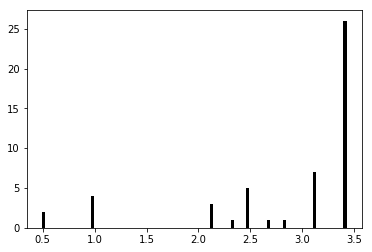

In [517]:
n, bins, patches = plt.hist(random_End_Energy(5,50), 100, density=False, facecolor='k', alpha=1)

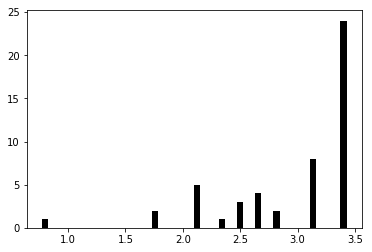

In [518]:
n, bins, patches = plt.hist(random_End_Energy(5,50), 50, density=False, facecolor='k', alpha=1)

In [618]:
import time
start_time = time.time()
n, bins, patches = plt.hist(random_End_Energy(5,5), 50, density=False, facecolor='k', alpha=1)
print("--- %s seconds ---" % (time.time() - start_time))

SyntaxError: invalid syntax (<ipython-input-618-1415081749ae>, line 6)

In [626]:
#6023.967724084854/(60*60)

CPU times: user 743 ms, sys: 0 ns, total: 743 ms
Wall time: 743 ms


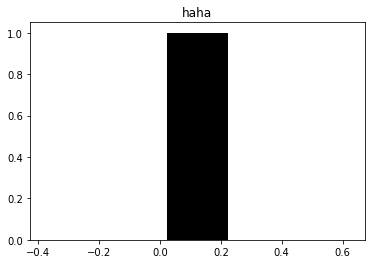

In [652]:
%%time
n, bins, patches = plt.hist(random_End_Energy(2.9,1),5, density=False, facecolor='k', alpha=1)
plt.title('haha')

In [461]:
#def plot(Energy):
#    a = []
#    theta=0
#    lim=limit_theta(Energy)
#    #limit=limit_theta(3)
#    for i in range(9000000):
#        if(theta<lim):
#            result= Orange(Energy,theta)
#            a.append(result)
#            theta=theta+.001
#        else:
#            break
#    return np.asarray(a)
#def t(Energy):
#    return np.arange(0,90,90/len(plot(Energy)))

In [469]:
#plt.plot(t(5),plot(5))
#plt.plot(t(4),plot(4))
#plt.plot(t(3),plot(3))

KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


KeyboardInterrupt: 

Exception ignored in: 'zmq.backend.cython.message.Frame.__dealloc__'
Traceback (most recent call last):
  File "zmq/backend/cython/checkrc.pxd", line 12, in zmq.backend.cython.checkrc._check_rc
KeyboardInterrupt


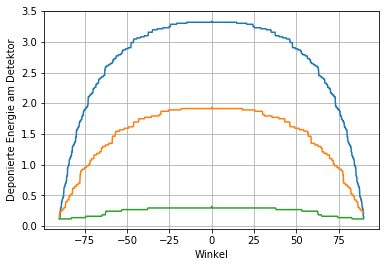

In [621]:
from numba import jit, int32
@jit
def plot2(Energy):
    a = []
    theta=-limit_theta(Energy)
    lim=limit_theta(Energy)
    #limit=limit_theta(3)
    for i in range(9000000):
        if(theta<lim):
            a.append(Orange(Energy,theta))
            theta=theta+.1
        else:
            break
    return np.asarray(a)
def t2(Energy):
    return np.arange(-90,90,180/len(plot2(Energy)))

plt.xlabel('Winkel')
plt.ylabel('Deponierte Energie am Detektor')
plt.grid(True)
plt.plot(t2(5),plot2(5))
plt.plot(t2(4),plot2(4))
plt.plot(t2(3),plot2(3))
plt.savefig('winkel3.png')

In [653]:
32326.82192826271 /(60*60)

8.979672757850754

# 210 po = 5.3 MeV - 
## 241 Am = 5.4 Mev